#CNNs for Image Classification

##Digit Recognition
Overview of the problem:
* Aim: classify images of hand-written digits.
* Dataset: MNIST, 60,000 many 28x28 grayscale images.
* Model: a simple CNN.
* Criterion: Cross entropy loss.
* Optimizer: SGD or Adam.

Strategy:
We will build progressively complex models starting from a very simple CNN, and utilizing more complex methods along the way. Here is a brief description of the models we are going to build:
1. Simple CNN.
1. Adding more layers.
1. Adding Dropout.
1. Adding Batch Normalization (BN).


#Setup Preparation

In [0]:
# import torch and torchvision
!pip install -q torch==1.0.0 torchvision

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

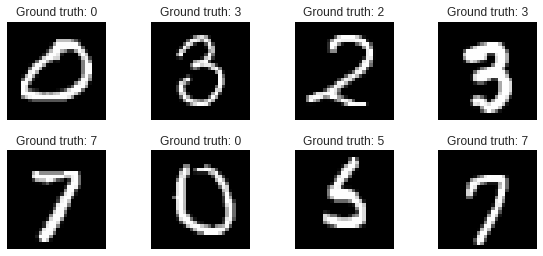

In [37]:
# set up common infrastructure, such as data, training parameters and so on. 
import torch
import torchvision
import torchvision.transforms as transforms
# set parameters for loading data
torch.manual_seed(7)
batch_size = 8

# define transform on a dataset
# the values for mean and standard deviation for MNIST dataset is from 'https://nextjournal.com/gkoehler/pytorch-mnist'.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])
# load MNIST data available in torchvision
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
# prepare batches for both trainset and testset
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

# let us look at some of the training images
import matplotlib.pyplot as plt
import numpy as np

#roll batches
batches = enumerate(train_loader)
batch_id, (images, labels) = next(batches)

print(images)

fig = plt.figure()
for i in range(8):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Ground truth: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
  
  
  
  




#Constructing models




In [0]:
# shallow CNN
import torch.nn as nn
import torch.nn.functional as F

class CNN_V1(nn.Module):
  def __init__(self):
    super(CNN_V1,self).__init__()
    self.conv = nn.Conv2d(1,3,3)
    self.fc = nn.Linear(3*26*26,10)
    
  def forward(self, x):
    x = F.relu(self.conv(x))
    x = x.view(-1, 3*26*26)
    x = self.fc(x)
    return x

In [0]:
# adding more layers
import torch.nn as nn
import torch.nn.functional as F

class CNN_V2(nn.Module):
  def __init__(self):
    super(CNN_V2,self).__init__()
    self.conv1 = nn.Conv2d(1,3,3)
    self.conv2 = nn.Conv2d(3,6,3)
    self.fc1 = nn.Linear(6*24*24,100)
    self.fc2 = nn.Linear(100,10)
    
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = x.view(-1, 6*24*24)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [0]:
# adding more layers and dropout
import torch.nn as nn
import torch.nn.functional as F

class CNN_V3(nn.Module):
  def __init__(self):
    super(CNN_V3,self).__init__()
    self.conv1 = nn.Conv2d(1,3,3)
    self.conv2 = nn.Conv2d(3,6,3)
    self.conv3 = nn.Conv2d(6,15,3)
    self.conv3_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(15*22*22,100)
    self.fc1_drop = nn.Dropout()
    self.fc2 = nn.Linear(100,10)
    
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.conv3_drop(F.relu(self.conv3(x)))
    x = x.view(-1, 15*22*22)
    x = F.relu(self.fc1(x))
    x = self.fc1_drop(x)
    x = self.fc2(x)
    return x

In [0]:
#adding more layers and batch normalization
import torch.nn as nn
import torch.nn.functional as F

class CNN_V4(nn.Module):
  def __init__(self):
    super(CNN_V4,self).__init__()
    self.conv1 = nn.Conv2d(1,3,3)
    self.conv2 = nn.Conv2d(3,6,3)
    self.conv3 = nn.Conv2d(6,15,3)
    self.conv3_bn = nn.BatchNorm2d(15)
    self.conv4 = nn.Conv2d(15,30,3)
    self.conv4_bn = nn.BatchNorm2d(30)
    self.conv4_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(30*20*20,500)
    self.fc1_bn = nn.BatchNorm1d(500)
    self.fc1_drop = nn.Dropout()
    self.fc2 = nn.Linear(500,100)
    self.fc2_drop = nn.Dropout()
    self.fc3 = nn.Linear(100,10)
    
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3_bn(self.conv3(x)))
    x = self.conv4_bn(self.conv4(x))
    x = self.conv4_drop(F.relu(x))
    x = x.view(-1, 30*20*20)
    x = self.fc1_bn(self.fc1(x))
    x = self.fc1_drop(F.relu(x))
    x = self.fc2_drop(F.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

#Initiating and Training models


In [43]:
cnn_v1 = CNN_V1()
cnn_v2 = CNN_V2()
cnn_v3 = CNN_V3()
cnn_v4 = CNN_V4()
# let's do a single forward prop as a sanity check
x = torch.rand(1,1,28,28)
out_v1 = cnn_v1(x)
out_v2 = cnn_v2(x)
out_v3 = cnn_v3(x)
out_v4 = cnn_v4(x)
print("Output for V1: {}".format(out_v1))
print("Output for V2: {}".format(out_v2))
print("Output for V3: {}".format(out_v3))
print("Output for V4: {}".format(out_v4))

ValueError: ignored

In [0]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_v1.parameters(), lr=0.001)

# define number of epochs, i.e. number of 
epochs = 2

In [21]:
# training
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get inputs
    inputs, labels = data
    
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = cnn_v1(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # printing statistics
    running_loss += loss.item()
    if i%1000 == 999:
      print('Epoch: {}, Batch: {} - Loss: {}'.format(epoch, i+1, running_loss/1000))
      running_loss = 0
print('Finished Training')

Epoch: 0, Batch: 1000 - Loss: 4.381936936378479
Epoch: 0, Batch: 2000 - Loss: 4.217115129470825
Epoch: 0, Batch: 3000 - Loss: 4.097155544281006
Epoch: 0, Batch: 4000 - Loss: 3.975983458995819
Epoch: 0, Batch: 5000 - Loss: 3.888203641176224
Epoch: 0, Batch: 6000 - Loss: 3.8627274570465087
Epoch: 1, Batch: 1000 - Loss: 3.7490809235572815
Epoch: 1, Batch: 2000 - Loss: 3.7242246358394624
Epoch: 1, Batch: 3000 - Loss: 3.6744369032382966
Epoch: 1, Batch: 4000 - Loss: 3.7015702848434446
Epoch: 1, Batch: 5000 - Loss: 3.6336449456214903
Epoch: 1, Batch: 6000 - Loss: 3.6162652995586395
Finished Training


## Comments on Training Process:
* Training error did not drop much: need to use more complex models.
* Training process was very long: use GPUs

In [0]:
# testing trained cnn_v1
total = 0
correct = 0
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    outputs = cnn_v1(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on 10,000 images is {}'.format(correct/total))

Accuracy of the network on 10,000 images is 0.951


##Comments on Testing Process
* Though cnn_v1 looked weak during training, it produced 95.1% accuracy on the training set.

#Adding more layers

In [0]:
# let's add few more layers
import torch.nn as nn
import torch.nn.functional as F

class CNN_V2(nn.Module):
  def __init__(self):
    super(CNN_V2,self).__init__()
    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,10,3)
    self.conv3 = nn.Conv2d(10,15,3)
    self.fc1 = nn.Linear(15*22*22,500)
    self.fc2 = nn.Linear(500,100)
    self.fc3 = nn.Linear(100,10)
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 15*22*22)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [0]:
cnn_v2 = CNN_V2()
# forward pass for a sanity check
x = torch.rand(1,1,28,28)
out = cnn_v2(x)
print(out)

tensor([[-0.0892, -0.0061,  0.0226, -0.0412, -0.0960,  0.0950, -0.0103, -0.0221,
         -0.0303, -0.0252]], grad_fn=<AddmmBackward>)


In [0]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_v1.parameters(), lr=0.001)

# define number of epochs, i.e. number of 
epochs = 2

In [0]:
# let's use gpu's for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
cnn_v2_gpu = cnn_v2.to(device)

# training with gpu's
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get inputs
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = cnn_v2_gpu(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # printing statistics
    running_loss += loss.item()
    if i%500 == 499:
      print('Epoch: {}, Batch: {} - Loss: {}'.format(epoch, i+1, running_loss/500))
      running_loss = 0
print('Finished Training')
    

cuda:0
Epoch: 0, Batch: 500 - Loss: 2.304574866771698
Epoch: 0, Batch: 1000 - Loss: 2.3053252067565917
Epoch: 0, Batch: 1500 - Loss: 2.3048322396278382
Epoch: 0, Batch: 2000 - Loss: 2.305904438495636
Epoch: 0, Batch: 2500 - Loss: 2.305352098941803
Epoch: 0, Batch: 3000 - Loss: 2.3052590651512146
Epoch: 0, Batch: 3500 - Loss: 2.3047765750885008
Epoch: 0, Batch: 4000 - Loss: 2.306828869342804
Epoch: 0, Batch: 4500 - Loss: 2.305187074184418
Epoch: 0, Batch: 5000 - Loss: 2.3054191184043886
Epoch: 0, Batch: 5500 - Loss: 2.3053304901123046
Epoch: 0, Batch: 6000 - Loss: 2.305799864768982
Epoch: 0, Batch: 6500 - Loss: 2.3050826783180236
Epoch: 0, Batch: 7000 - Loss: 2.305017894268036
Epoch: 0, Batch: 7500 - Loss: 2.3035001573562623
Epoch: 1, Batch: 500 - Loss: 2.3045323376655578
Epoch: 1, Batch: 1000 - Loss: 2.3064477105140684
Epoch: 1, Batch: 1500 - Loss: 2.305724175453186
Epoch: 1, Batch: 2000 - Loss: 2.306945587158203
Epoch: 1, Batch: 2500 - Loss: 2.3047574834823608
Epoch: 1, Batch: 3000 - 

In [0]:
# let's build a simple CNN
import torch.nn as nn
import torch.nn.functional as F

class simpleCNN(nn.Module):
  def __init__(self):
    super(simpleCNN,self).__init__()
    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,10,3)
    self.conv3 = nn.Conv2d(10,15,3)
    self.conv3_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(15*22*22,500)
    self.fc2 = nn.Linear(500,100)
    self.fc3 = nn.Linear(100,10)
    self.fc_drop = nn.Dropout()
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.conv3_drop(F.relu(self.conv3(x)))
    x = x.view(-1, 15*22*22)
    x = F.relu(self.fc1(x))
    x = self.fc_drop(F.relu(self.fc2(x)))
    x = self.fc3(x)
    return x

In [0]:
model = simpleCNN()
x = torch.rand(1,1,28,28)
out = model(x)
print(out)

tensor([[ 0.0092,  0.0147, -0.0975, -0.0603, -0.0372, -0.0172,  0.0542,  0.0905,
         -0.0865, -0.0768]], grad_fn=<AddmmBackward>)


In [0]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

epochs = 10

In [0]:
# training
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get inputs
    inputs, labels = data
    
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # printing statistics
    running_loss += loss.item()
    if i%200 == 199:
      print('Epoch: {}, Batch: {} - Loss: {}'.format(epoch, i, running_loss/2000))
      running_loss = 0
print('Finished Training')
    

Epoch: 0, Batch: 199 - Loss: 0.1606016823798418
Epoch: 0, Batch: 399 - Loss: 0.09473657794296741
Epoch: 0, Batch: 599 - Loss: 0.08131995962560176
Epoch: 0, Batch: 799 - Loss: 0.06809577090293169
Epoch: 0, Batch: 999 - Loss: 0.058189478434622285
Epoch: 0, Batch: 1199 - Loss: 0.052750581294298174


KeyboardInterrupt: ignored

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model_gpu = model.to(device)

cuda:0


In [0]:
# training on gpu's
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get inputs
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # printing statistics
    running_loss += loss.item()
    if i%200 == 199:
      print('Epoch: {}, Batch: {} - Loss: {}'.format(epoch, i, running_loss/2000))
      running_loss = 0
print('Finished Training')
    

Epoch: 0, Batch: 199 - Loss: 0.22619755971431732
Epoch: 0, Batch: 399 - Loss: 0.1534698329716921
Epoch: 0, Batch: 599 - Loss: 0.10687925186753273
Epoch: 0, Batch: 799 - Loss: 0.08755979834496976
Epoch: 0, Batch: 999 - Loss: 0.07356348738074303
Epoch: 0, Batch: 1199 - Loss: 0.06440420345962047
Epoch: 0, Batch: 1399 - Loss: 0.05879504141956568
Epoch: 0, Batch: 1599 - Loss: 0.050387114867568014
Epoch: 0, Batch: 1799 - Loss: 0.05279903920739889
Epoch: 0, Batch: 1999 - Loss: 0.04583788900822401
Epoch: 0, Batch: 2199 - Loss: 0.042096381202340126
Epoch: 0, Batch: 2399 - Loss: 0.03987231086939573
Epoch: 0, Batch: 2599 - Loss: 0.03486914905905723
Epoch: 0, Batch: 2799 - Loss: 0.04064674615114927
Epoch: 0, Batch: 2999 - Loss: 0.03417990254610777
Epoch: 0, Batch: 3199 - Loss: 0.03945361467450857
Epoch: 0, Batch: 3399 - Loss: 0.03461999867111445
Epoch: 0, Batch: 3599 - Loss: 0.03325802195817232
Epoch: 0, Batch: 3799 - Loss: 0.031181019999086856
Epoch: 0, Batch: 3999 - Loss: 0.03332561198621988
Epo

In [0]:
# testing model_gpu
total = 0
correct = 0
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model_gpu(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on 10,000 images is {}'.format(correct/total))

Accuracy of the network on 10,000 images is 0.9826
